In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
data = pd.read_csv(r"C:\Users\imins\Downloads\tcp-connection.csv")

### Data understanding 

In [39]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion
0,0,b'udp',b'domain_u',b'SF',44,134,0,0,0,0,...,89,0.64,0.01,0.01,0.00,0.0,0.0,0.0,0.0,b'normal.'
1,0,b'tcp',b'smtp',b'SF',1489,385,0,0,0,0,...,116,1.00,0.00,0.20,0.02,0.0,0.0,0.0,0.0,b'normal.'
2,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,b'smurf.'
3,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,b'smurf.'
4,0,b'tcp',b'private',b'S0',0,0,0,0,0,0,...,6,0.02,0.07,0.00,0.00,1.0,1.0,0.0,0.0,b'neptune.'


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

In [41]:
data.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serrer_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [42]:
data['protocol_type'].value_counts()

b'icmp'    283602
b'tcp'     190065
b'udp'      20354
Name: protocol_type, dtype: int64

In [43]:
data['service'].value_counts()

b'ecr_i'      281400
b'private'    110893
b'http'        64293
b'smtp'         9723
b'other'        7237
               ...  
b'X11'            11
b'tim_i'           7
b'tftp_u'          1
b'red_i'           1
b'pm_dump'         1
Name: service, Length: 66, dtype: int64

In [44]:
data['flag'].value_counts()

b'SF'        378440
b'S0'         87007
b'REJ'        26875
b'RSTR'         903
b'RSTO'         579
b'SH'           107
b'S1'            57
b'S2'            24
b'RSTOS0'        11
b'S3'            10
b'OTH'            8
Name: flag, dtype: int64

In [45]:
data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serrer_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'intrusion'],
      dtype='object')

### Feature selection and Encoding 

In [46]:
x = data[['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serrer_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate']]
y = data['intrusion']

In [47]:
##One hot encoding 
x = pd.get_dummies(x, columns = ['protocol_type'])

In [48]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   service                      494021 non-null  object 
 2   flag                         494021 non-null  object 
 3   src_bytes                    494021 non-null  int64  
 4   dst_bytes                    494021 non-null  int64  
 5   land                         494021 non-null  int64  
 6   wrong_fragment               494021 non-null  int64  
 7   urgent                       494021 non-null  int64  
 8   hot                          494021 non-null  int64  
 9   num_failed_logins            494021 non-null  int64  
 10  logged_in                    494021 non-null  int64  
 11  num_compromised              494021 non-null  int64  
 12  root_shell                   494021 non-null  int64  
 13 

In [49]:
## Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [50]:
x[['service', 'flag']] = x[['service','flag']].apply(le.fit_transform)

In [51]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   service                      494021 non-null  int32  
 2   flag                         494021 non-null  int32  
 3   src_bytes                    494021 non-null  int64  
 4   dst_bytes                    494021 non-null  int64  
 5   land                         494021 non-null  int64  
 6   wrong_fragment               494021 non-null  int64  
 7   urgent                       494021 non-null  int64  
 8   hot                          494021 non-null  int64  
 9   num_failed_logins            494021 non-null  int64  
 10  logged_in                    494021 non-null  int64  
 11  num_compromised              494021 non-null  int64  
 12  root_shell                   494021 non-null  int64  
 13 

### Outlier detection  and handling

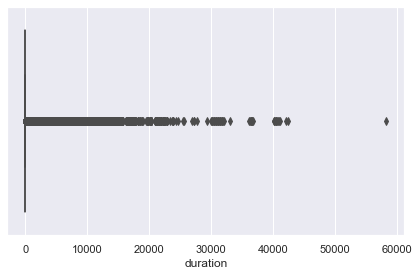

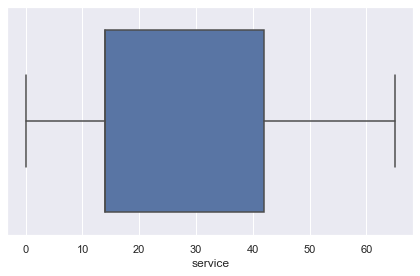

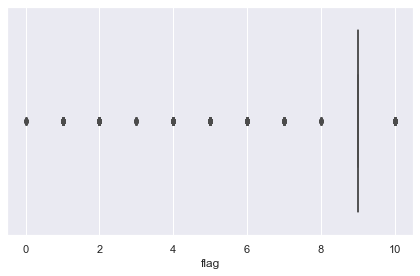

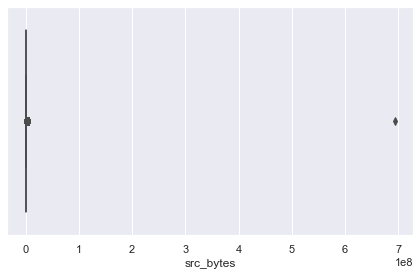

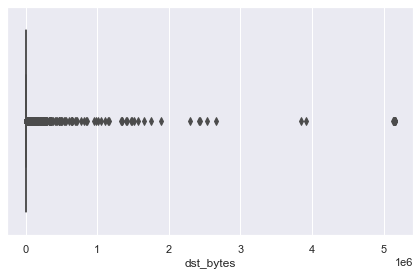

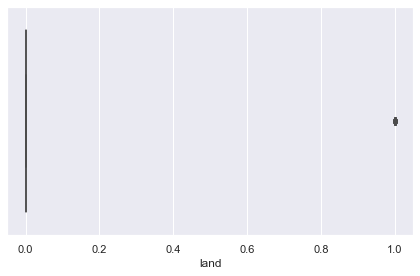

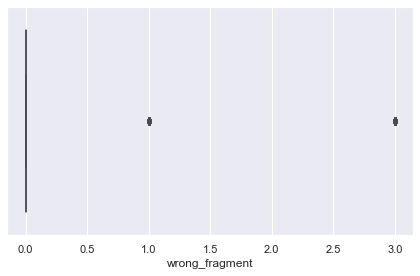

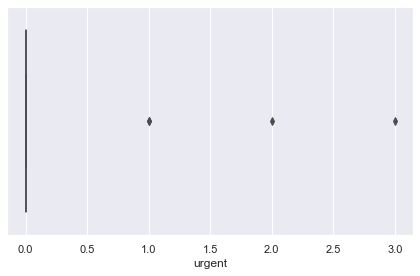

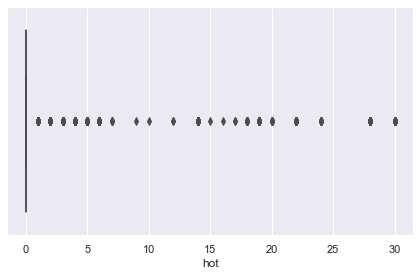

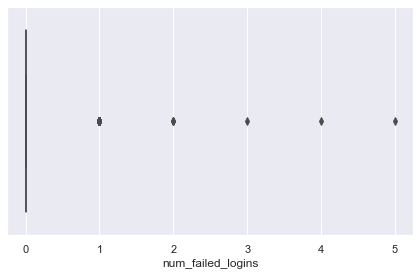

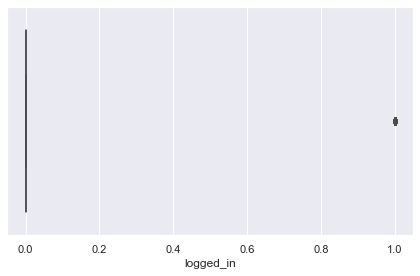

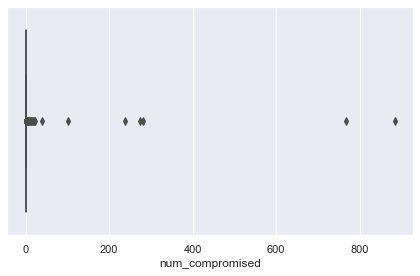

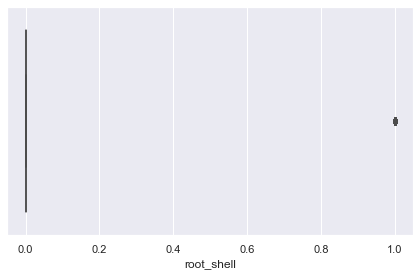

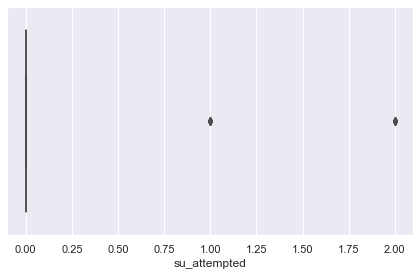

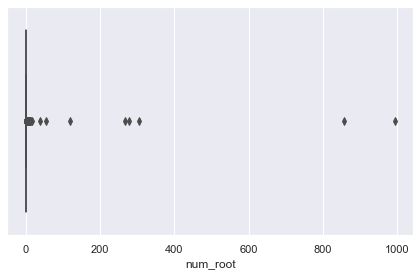

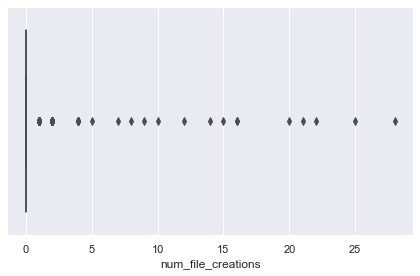

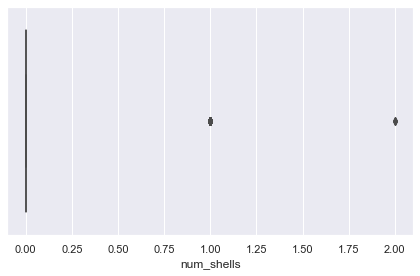

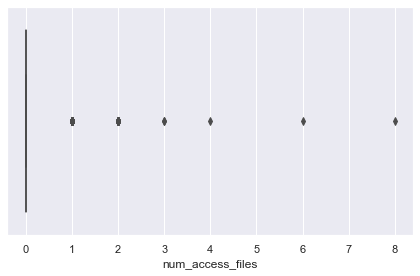

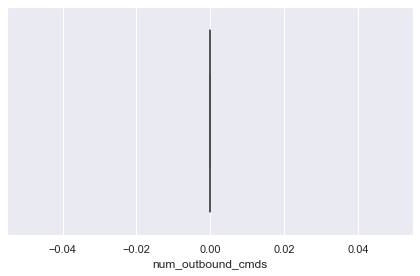

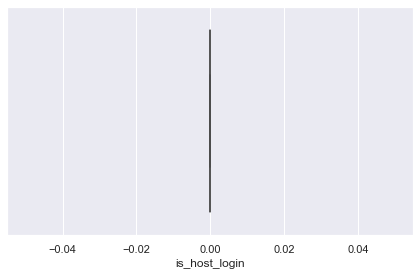

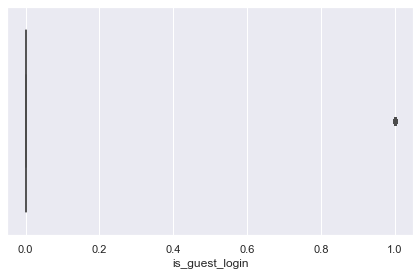

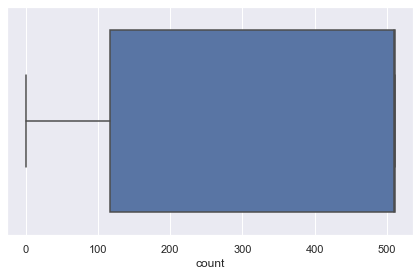

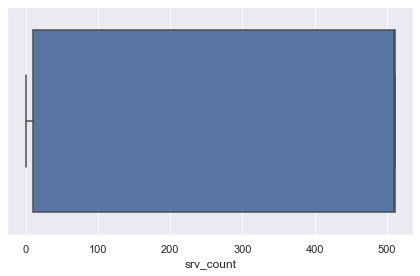

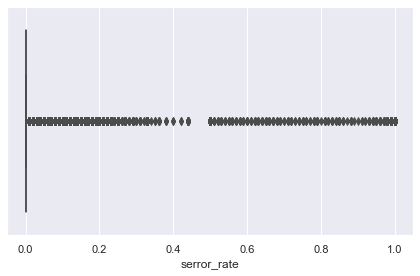

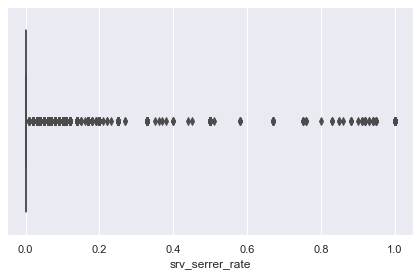

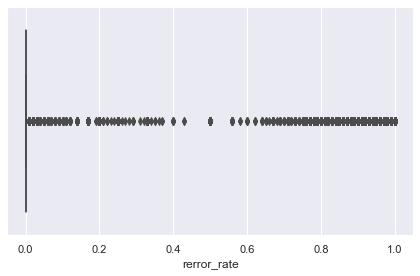

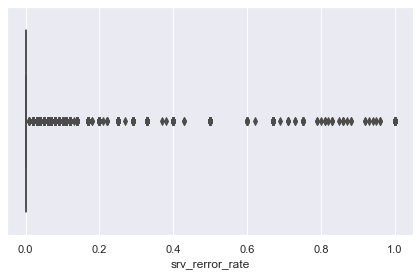

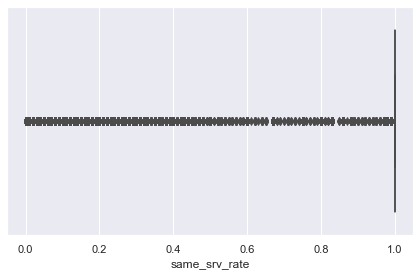

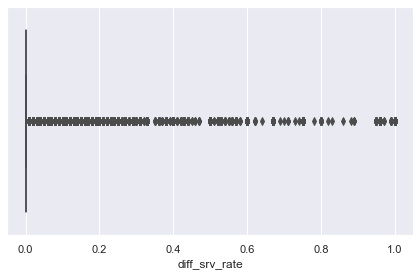

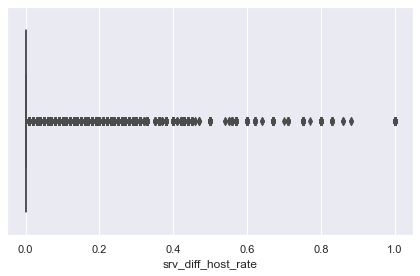

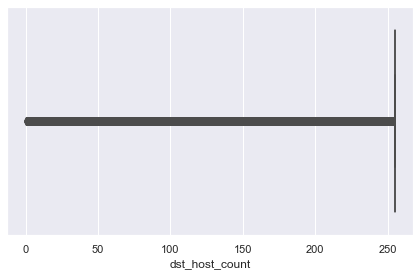

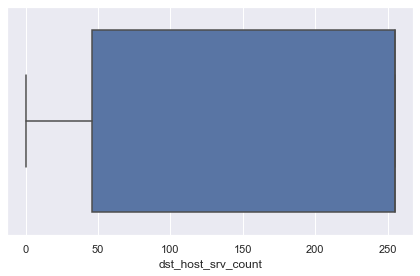

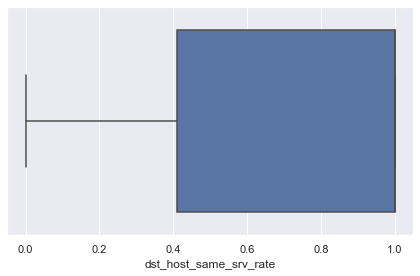

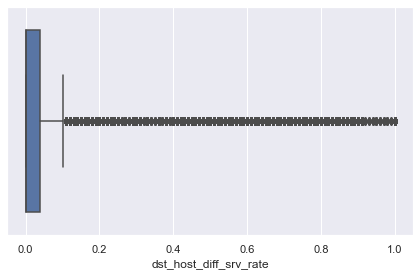

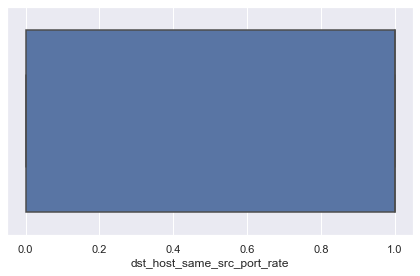

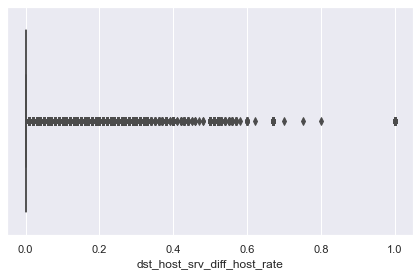

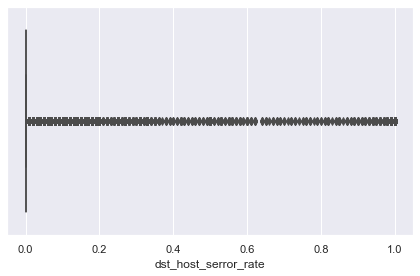

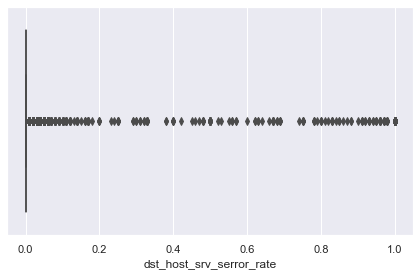

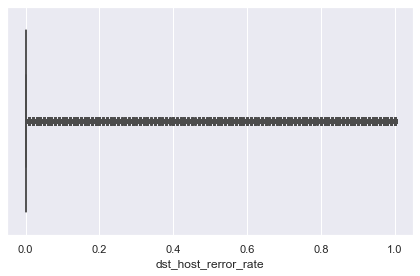

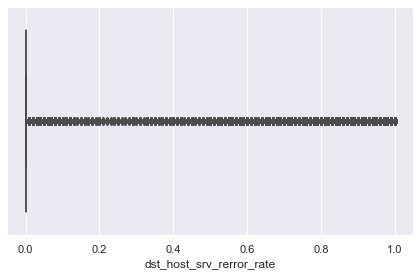

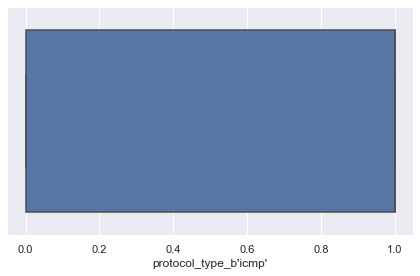

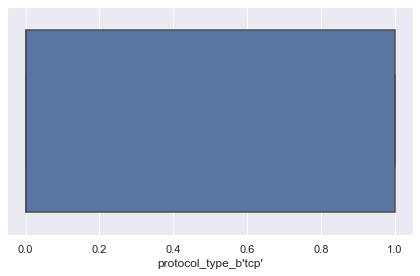

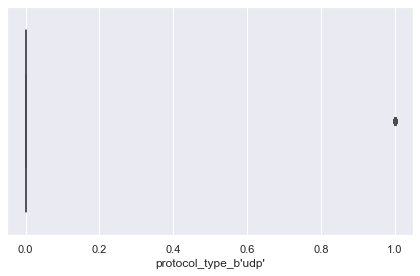

In [53]:
import warnings
warnings.filterwarnings('ignore')
for i in x.columns:
    sns.set(rc = {'figure.figsize':(6,4)})
    sns.boxplot(x[i])
    plt.show()

In [54]:
for i in x.columns:
    q1= x[i].quantile(0.25)
    q3= x[i].quantile(0.75)
    iqr= q3-q1
    low = q1-1.5*iqr
    upp= q3+1.5*iqr
    outliers= x[((x[i]<low)|(x[i]>upp))]    
    print(i, len(outliers)/x.shape[0] * 100)

duration 2.49989372921394
service 0.0
flag 23.39596899726935
src_bytes 0.9785009139287602
dst_bytes 17.36019319016803
land 0.004453251987263699
wrong_fragment 0.2505966345560209
urgent 0.0008096821795024908
hot 0.6461263792429877
num_failed_logins 0.012752494327164231
logged_in 14.82467344505598
num_compromised 0.45018329180338484
root_shell 0.01113312996815925
su_attempted 0.0024290465385074724
num_root 0.11841601875223928
num_file_creations 0.053641444392040015
num_shells 0.010323447788656757
num_access_files 0.0918989273735327
num_outbound_cmds 0.0
is_host_login 0.0
is_guest_login 0.13865807323980153
count 0.0
srv_count 0.0
serror_rate 18.062794901431314
srv_serrer_rate 17.88081883158813
rerror_rate 5.884972501168979
srv_rerror_rate 6.01209260335087
same_srv_rate 22.659360634466953
diff_srv_rate 22.671101026069742
srv_diff_host_rate 7.012657356671073
dst_host_count 12.386517982029103
dst_host_srv_count 0.0
dst_host_same_srv_rate 0.0
dst_host_diff_srv_rate 2.2717657751391136
dst_host

In [55]:
for j in x.columns:
    Q1 = x[j].quantile(0.25)
    Q3 = x[j].quantile(0.75)
    IQR = Q3 - Q1
    l_lim=Q1-1.5*IQR
    u_lim=Q3+1.5*IQR
    x[j].where(x[j] >=l_lim,l_lim, inplace=True)  
    x[j].where(x[j] <=u_lim,u_lim, inplace=True)  

In [56]:
for i in x.columns:
    q1= x[i].quantile(0.25)
    q3= x[i].quantile(0.75)
    iqr= q3-q1
    low = q1-1.5*iqr
    upp= q3+1.5*iqr
    outliers= x[((x[i]<low)|(x[i]>upp))]    
    print(i, len(outliers)/x.shape[0] * 100)

duration 0.0
service 0.0
flag 0.0
src_bytes 0.0
dst_bytes 0.0
land 0.0
wrong_fragment 0.0
urgent 0.0
hot 0.0
num_failed_logins 0.0
logged_in 0.0
num_compromised 0.0
root_shell 0.0
su_attempted 0.0
num_root 0.0
num_file_creations 0.0
num_shells 0.0
num_access_files 0.0
num_outbound_cmds 0.0
is_host_login 0.0
is_guest_login 0.0
count 0.0
srv_count 0.0
serror_rate 0.0
srv_serrer_rate 0.0
rerror_rate 0.0
srv_rerror_rate 0.0
same_srv_rate 0.0
diff_srv_rate 0.0
srv_diff_host_rate 0.0
dst_host_count 0.0
dst_host_srv_count 0.0
dst_host_same_srv_rate 0.0
dst_host_diff_srv_rate 0.0
dst_host_same_src_port_rate 0.0
dst_host_srv_diff_host_rate 0.0
dst_host_serror_rate 0.0
dst_host_srv_serror_rate 0.0
dst_host_rerror_rate 0.0
dst_host_srv_rerror_rate 0.0
protocol_type_b'icmp' 0.0
protocol_type_b'tcp' 0.0
protocol_type_b'udp' 0.0


### Scaling and Train/Test Split

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [60]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [61]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=50)

### Model Selection

In [62]:
from sklearn.metrics import accuracy_score

In [70]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
accuracy_score(y_test, y_pred).round(4)

0.9962

In [69]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy_score(y_test, y_pred).round(4)

0.9983

In [68]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(x_train, y_train)
y_pred = sv.predict(x_test)
accuracy_score(y_test, y_pred).round(4)

0.9973

In [67]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
accuracy_score(y_test, y_pred).round(4)

0.999

### It is clear that Decision Tree Classifier has the highest accuracy of 0.999